# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/wirin/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

In [6]:
from dqn_agent import Agent
from model import QNetwork

# initialize the agent 
agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, seed=0)

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                                                   # list containing scores from each episode
    scores_window = deque(maxlen=100)                             # last 100 scores
    eps = eps_start                                               # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]         # reset the environment
        state = env_info.vector_observations[0]                   # get initial state
        score = 0                                                 # initilize score to zero
        
        for t in range(max_t):                                    # run interations for a max time 
            action = agent.act(state, eps)                        # choose an action based on epsilon-greedy policy
            env_info = env.step(action)[brain_name]               # get the environment info from that action
            next_state = env_info.vector_observations[0]          # get the new state
            reward = env_info.rewards[0]                          # get the reward for that selected action
            done = env_info.local_done[0]                         # information whether its done or not
            agent.step(state, action, reward, next_state, done)   # choose the step based on experience replay   
            score += reward                                       # update the score
            state = next_state                                
            if done:                                             
                break
        scores_window.append(score)                               # append last 100 scores
        scores.append(score)                                      # final list of scores for all episodes
        eps = max(eps_end, eps * eps_decay)                       # epsilon decay rule
        average_score = np.mean(scores_window)                    # get the average score
        print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score))
        if average_score >= 13:                                   # if average score is greater than 13, then terminate
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(i_episode - 100, average_score))
            torch.save(agent.qnetwork_local.state_dict(), 'DQN.pth')
            break
    
    return scores  

In [8]:
scores = dqn()

Episode 100 	Average score:  1.15
Episode 200 	Average score:  4.70
Episode 300 	Average score:  8.71
Episode 400 	Average score:  10.80
Episode 500 	Average score:  12.53
Episode 564 	Average score:  13.01
Environment solved in  464 episodes!	Average Score:  13.01


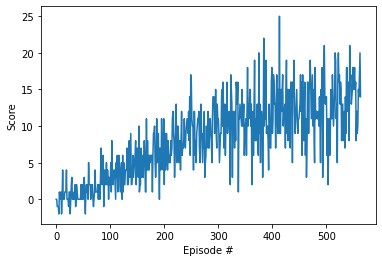

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('./DQN_results.png', bbox_inches='tight')
plt.show()

In [10]:
agent.qnetwork_local.load_state_dict(torch.load('DQN.pth'))                # load the trained weights (checkpoint)
env_info = env.reset(train_mode=False)[brain_name]                         # reset the environment
state = env_info.vector_observations[0]                                    # get the current state
score = 0                                         
while True:
    action = agent.act(state)                                              # get the action from the agent
    env_info = env.step(action)[brain_name]                                # choose the action to get reward and next state
    next_state = env_info.vector_observations[0]                           # get the next state 
    reward = env_info.rewards[0]                                           # get the reward
    done = env_info.local_done[0]                                          # information about episode status
    score += reward                                                        # update the scores
    state = next_state                                                     # update new state to be current state
    if done:                                      
        break
    
print("Score: {}".format(score)) 

Score: 21.0


In [11]:
env.close()